In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv('dataset.csv')  
df.drop('Customer_ID', axis=1, inplace=True)

In [3]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder for binary columns
le = LabelEncoder()

categorical_cols = ["Gender","Email_Opt_In","Promotion_Response","Target_Churn"]
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

In [4]:
feature_cols = [
    'Total_Spend',
    'Annual_Income',
    'Last_Purchase_Days_Ago',
    'Average_Transaction_Amount',
    'Num_of_Purchases',
    'Age',
    'Years_as_Customer',
    'Num_of_Returns'
]
X = df[feature_cols]
y = df["Target_Churn"]

In [5]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state = 42,stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [6]:
from sklearn.preprocessing import MinMaxScaler
import joblib

scaler = MinMaxScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])
joblib.dump(scaler, 'min_max.pkl')

['min_max.pkl']

## Confusion Matrix

In [20]:
from utils import plot_confusion_matrix

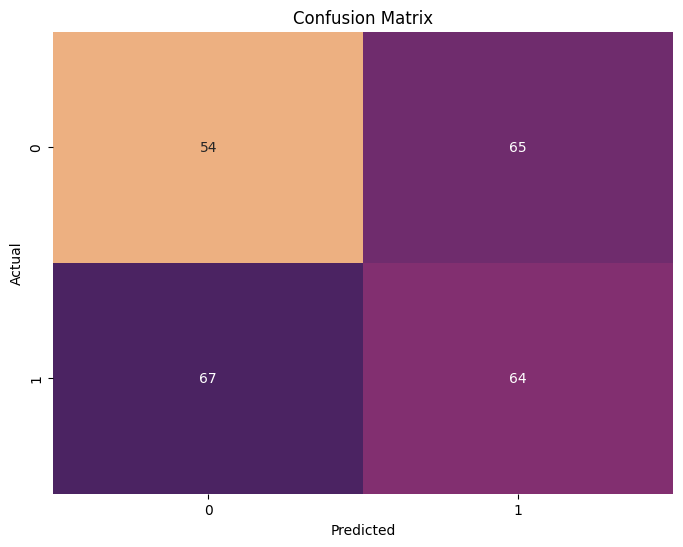

In [21]:
plot_confusion_matrix("models/rf.pkl", X_test, y_test)

In [ ]:
plot_confusion_matrix("models/xgb.pkl", X_test, y_test) #before tunning 

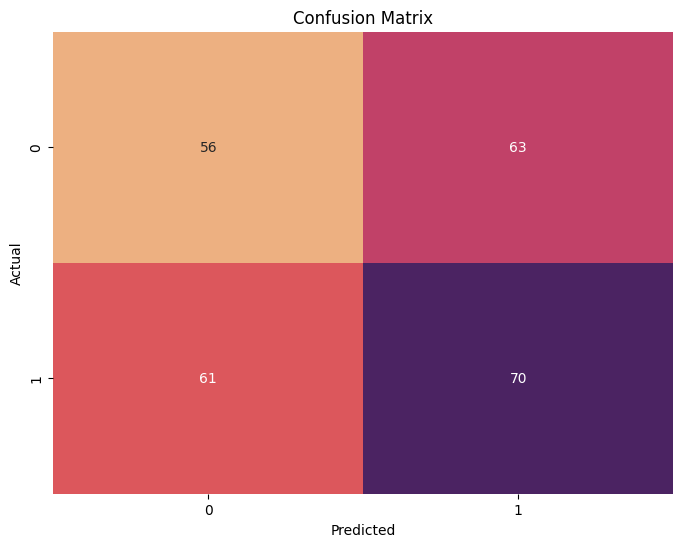

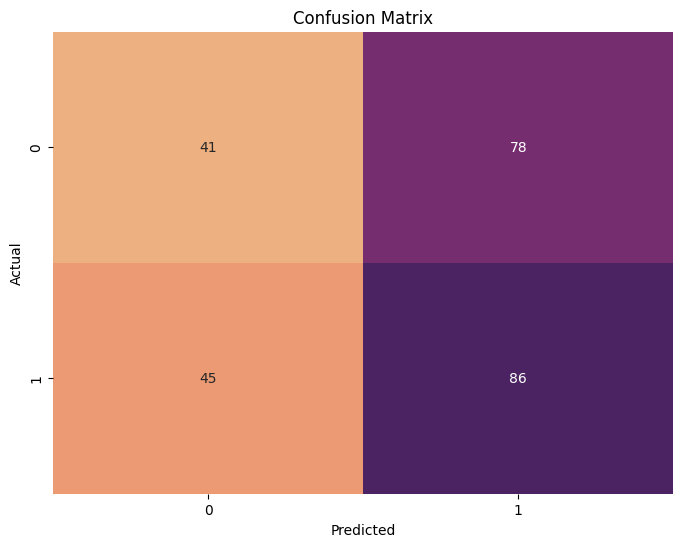

In [9]:
plot_confusion_matrix("models/xgb.pkl", X_test, y_test) #after tunning

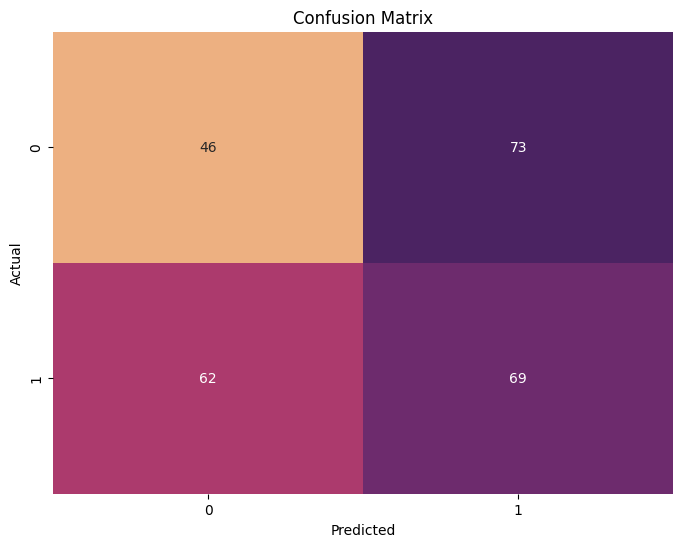

In [10]:
plot_confusion_matrix("models/lightgbm.pkl", X_test, y_test)

In [18]:
from utils import evaluate_model_performance

Accuracy: 0.4720
Precision: 0.4961
Recall: 0.4885
F1-Score: 0.4923
ROC-AUC: 0.4709


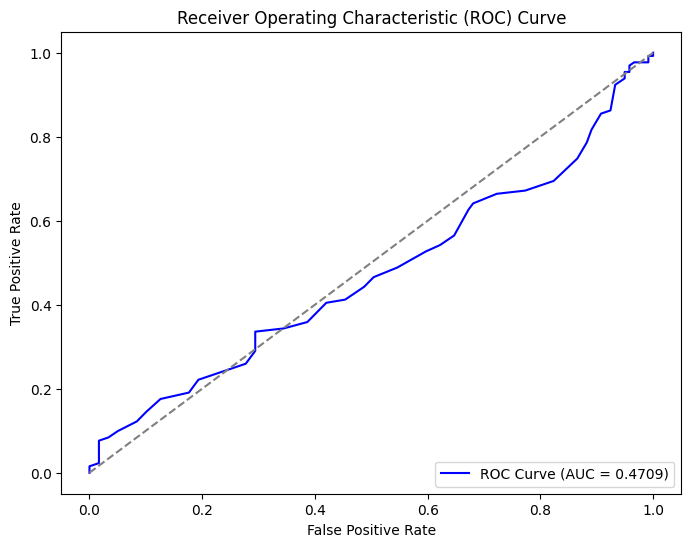

In [19]:
evaluate_model_performance("models/rf.pkl", X_test, y_test)

Accuracy: 0.5080
Precision: 0.5244
Recall: 0.6565
F1-Score: 0.5831
ROC-AUC: 0.4992


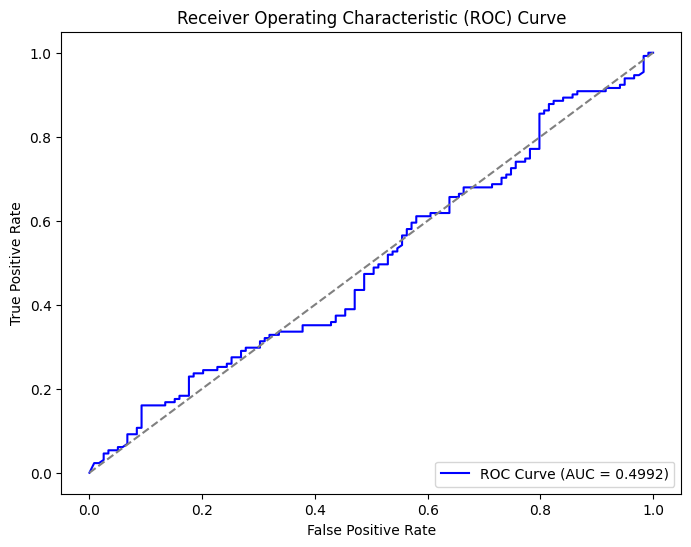

In [13]:
evaluate_model_performance("models/xgb.pkl", X_test, y_test)

Accuracy: 0.4600
Precision: 0.4859
Recall: 0.5267
F1-Score: 0.5055
ROC-AUC: 0.4735


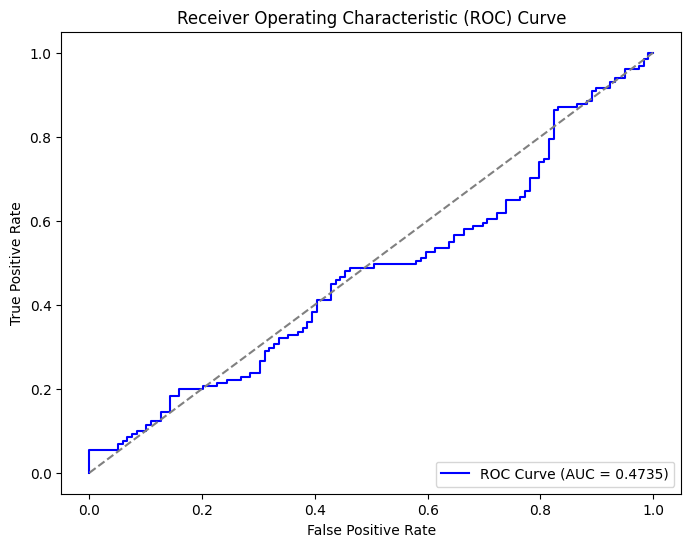

In [14]:
evaluate_model_performance("models/lightgbm.pkl", X_test, y_test)

In [ ]:
import pandas as pd

# Data for the models
data = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"],
    "RandomForest": [0.4720, 0.4961, 0.4885, 0.4923, 0.4709],
    "XGBoost": [0.5080, 0.5244, 0.6565, 0.5831, 0.4992],
    "LightGBM": [0.4600, 0.4859, 0.5267, 0.5055, 0.4735]
}

# Creating the dataframe
df = pd.DataFrame(data)

# Save the dataframe to a CSV file
df.to_csv('model_performance_metrics.csv', index=False)

In [17]:
metrics = pd.read_csv('model_performance_metrics.csv')
metrics

,Metric,RandomForest,XGBoost,LightGBM
0,Accuracy,0.4720,0.5080,0.4600
1,Precision,0.4961,0.5244,0.4859
2,Recall,0.4885,0.6565,0.5267
3,F1-Score,0.4923,0.5831,0.5055
4,ROC-AUC,0.4709,0.4992,0.4735
